# Определение перспективного тарифа для телеком-компании

### Описание проекта 

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Цель исследования** - определить, какой тариф приносит приносит больше денег компании.

## Изучение данных из файла

**Описание данных**

- Таблица users (информация о пользователях):
    - `user_id` — уникальный идентификатор пользователя
    - `first_name` — имя пользователя
    - `last_name` — фамилия пользователя
    - `age` — возраст пользователя (годы)
    - `reg_date` — дата подключения тарифа (день, месяц, год)
    - `churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
    - `city` — город проживания пользователя
    - `tariff` — название тарифного плана
- Таблица calls (информация о звонках):
    - `id` — уникальный номер звонка
    - `call_date` — дата звонка
    - `duration` — длительность звонка в минутах
    - `user_id` — идентификатор пользователя, сделавшего звонок
- Таблица messages (информация о сообщениях):
    - `id` — уникальный номер сообщения
    - `message_date` — дата сообщения
    - `user_id` — идентификатор пользователя, отправившего сообщение
- Таблица internet (информация об интернет-сессиях):
    - `id` — уникальный номер сессии
    - `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах)
    - `session_date` — дата интернет-сессии
    - `user_id` — идентификатор пользователя
- Таблица tariffs (информация о тарифах):
    - `tariff_name` — название тарифа
    - `rub_monthly_fee` — ежемесячная абонентская плата в рублях
    - `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату
    - `messages_included` — количество сообщений в месяц, включённых в абонентскую плату
    - `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
    - `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
    - `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета
    - `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

Выгрузим данные таблиц в следующие датафреймы:

Название переменных:
- data_calls - calls.csv
- data_internet - internet.csv
- data_messages - messages.csv
- data_tariffs - tariffs.csv
- data_users - users.csv

In [1]:
# Импорт необходимых библиотек
import os
import pandas as pd
import numpy as np
from scipy import stats as st
import warnings
import matplotlib.pyplot as plt

In [2]:
# Загрузка файла данных

data_path_local_1 = 'C:/Users/Asus3/Documents/Яндекс.Практикум/projects/data/project_4/calls.csv'
data_path_local_2 = 'C:/Users/Asus3/Documents/Яндекс.Практикум/projects/data/project_4/internet.csv'
data_path_local_3 = 'C:/Users/Asus3/Documents/Яндекс.Практикум/projects/data/project_4/messages.csv'
data_path_local_4 = 'C:/Users/Asus3/Documents/Яндекс.Практикум/projects/data/project_4/tariffs.csv'
data_path_local_5 = 'C:/Users/Asus3/Documents/Яндекс.Практикум/projects/data/project_4/users.csv'

#данные на сервере
data_path_server_1 = '/datasets/calls.csv'
data_path_server_2 = '/datasets/internet.csv'
data_path_server_3 = '/datasets/messages.csv'
data_path_server_4 = '/datasets/tariffs.csv'
data_path_server_5 = '/datasets/users.csv'

if os.path.exists(data_path_local_1):
    data_calls = pd.read_csv(data_path_local_1, sep=',')
    data_internet = pd.read_csv(data_path_local_2, sep=',')
    data_messages = pd.read_csv(data_path_local_3, sep=',')
    data_tariffs = pd.read_csv(data_path_local_4, sep=',')
    data_users = pd.read_csv(data_path_local_5, sep=',')
    print('Успешное чтение файлов')
elif os.path.exists(data_path_server_1):
    data_calls = pd.read_csv(data_path_server_1, sep=',')
    data_internet = pd.read_csv(data_path_server_2, sep=',')
    data_messages = pd.read_csv(data_path_server_3, sep=',')
    data_tariffs = pd.read_csv(data_path_server_4, sep=',')
    data_users = pd.read_csv(data_path_server_5, sep=',')  
    print('Успешное чтение файлов')
else:
    print('Путь к файлу не найден')

Успешное чтение файлов


In [3]:
pd.set_option('display.max_columns', None)

#### 1. Информация о пользователях:

In [4]:
data_users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


In [5]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [6]:
data_users.query('reg_date == churn_date')

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff


В столбце `churn_date` есть пропуски, это значит, что клиент не менял тариф. 

#### 2. Информация о звонках:

In [7]:
data_calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


In [8]:
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


#### 3. Информация о сообщениях

In [9]:
data_messages

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


In [10]:
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


`message_date` перевести в формат datetime.

#### 4. Информация об интернет-сессиях

In [11]:
data_internet

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


В столбце `mb_used` присутствуют нулевые значения - это может свидетельствовать о том, что в этот день клиент не пользовался мобильным интернетом.

In [12]:
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


В таблице присутствует столбец `Unnamed: 0`, который дублирует индексы датафрейма, далее удалим его.

#### 5. Информация о тарифах

In [13]:
data_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [14]:
data_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Добавим в таблицу количество гигабайтов

In [15]:
data_tariffs['gb_per_month_included'] = data_tariffs['mb_per_month_included'] / 1024
data_tariffs = data_tariffs.astype({'gb_per_month_included': np.int64})
data_tariffs.info()
data_tariffs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
 8   gb_per_month_included  2 non-null      int64 
dtypes: int64(8), object(1)
memory usage: 272.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,gb_per_month_included
0,50,15360,500,550,200,3,3,smart,15
1,1000,30720,3000,1950,150,1,1,ultra,30


## 1. Предобработка данных

### 1.1 Таблица о пользователях `data_users`

#### 1.1.1 Столбец `user_id`

In [16]:
print('Количество уникальных значений в столбце "user_id" :\n', data_users['user_id'].nunique())
#print('Множество уникальных значений в столбце "user_id" :\n', data_users['user_id'].unique())

Количество уникальных значений в столбце "user_id" :
 500


#### 1.1.2 Столбец `age`

In [17]:
#print('Множество значений в столбце "age" :\n', data_users['age'].unique())
print('Минимальное значение в столбце "age" =', data_users['age'].min())
print('Максимальное значение в столбце "age" =', data_users['age'].max())

Минимальное значение в столбце "age" = 18
Максимальное значение в столбце "age" = 75


Минимальный возраст клиента - 18 лет, максимальный возраст - 75 лет.
Аномальных значений не обнаружено: в таблице нет клиентов с возрастом меньше 18 лет, старше 100 лет или отрицательных значений.

#### 1.1.3 Столбец `reg_date`

In [18]:
print('Количество уникальных значений в столбце "reg_date" :\n', data_users['reg_date'].nunique())
#print('Множество значений в столбце "reg_date" :\n', data_users['reg_date'].unique())

Количество уникальных значений в столбце "reg_date" :
 270


#### 1.1.4 Столбец `churn_date`

In [19]:
print('Множество значений в столбце "churn_date" :\n', data_users['churn_date'].unique())

Множество значений в столбце "churn_date" :
 [nan '2018-10-05' '2018-12-18' '2018-11-21' '2018-10-03' '2018-10-14'
 '2018-12-09' '2018-12-11' '2018-12-26' '2018-08-31' '2018-12-03'
 '2018-12-23' '2018-11-07' '2018-12-16' '2018-12-20' '2018-11-30'
 '2018-12-21' '2018-08-17' '2018-09-02' '2018-10-04' '2018-11-13'
 '2018-11-22' '2018-10-28' '2018-11-26' '2018-11-27' '2018-11-16'
 '2018-10-27' '2018-12-30' '2018-09-27' '2018-12-25' '2018-12-14'
 '2018-12-24' '2018-09-26' '2018-10-25']


Значения Nan в этом случае говорят о том, что клиент пользуется тарифом.

### 1.2 Таблица о пользователях `data_calls`

#### 1.2.1 Столбец `id`

In [20]:
#print('Множество значений в столбце "id" :\n', data_calls['id'].unique())

In [21]:
(print('Множество значений меньше 0 в столбце "id" :\n', 
       data_calls[data_calls['id'] < '0']['id'].unique()))

Множество значений меньше 0 в столбце "id" :
 []


Значений меньше нуля нет, поэтому аномальных значений не обнаружено.

#### 1.2.2 Столбец `call_date`

In [22]:
print('Количество уникальных значений в столбце "call_date" :\n', data_calls['call_date'].nunique())
#print('Множество значений в столбце "call_date" :\n', data_calls['call_date'].unique())

Количество уникальных значений в столбце "call_date" :
 365


#### 1.2.3 Столбец `duration`

In [23]:
#print('Множество значений в столбце "duration" :\n', data_calls['duration'].unique())

In [24]:
(print('Множество значений меньше 0 в столбце "duration" :\n', 
       data_calls[data_calls['duration'] < 0]['duration'].unique()))

print('Максимальное значение в столбце "duration" =', data_calls['duration'].max())

Множество значений меньше 0 в столбце "duration" :
 []
Максимальное значение в столбце "duration" = 38.0


В столбце нет отрицальных значений, аномалий значений не обнаружено.

#### 1.2.4 Столбец `user_id`

In [25]:
print('Количество уникальных значений в столбце "user_id" :\n', data_calls['user_id'].nunique())
#print('Множество значений в столбце "user_id" :\n', data_calls['user_id'].unique())

Количество уникальных значений в столбце "user_id" :
 492


Видно, что уникальных пользователей, которые совершали звонки, меньше, чем всего пользователей в таблице. Поэтому можно сделать вывод, что некоторые пользователи не звонили никому, возможно, что эти клиенты пользуются планшетом и им нужен только интернет.
Аномальных значений не обнаружено.

### 1.3 Таблица о пользователях `messages`

### 1.3.2 Столбец `message_date`

In [26]:
print('Количество уникальных значений в столбце "message_date" :\n', data_messages['message_date'].nunique())
#print('Множество значений в столбце "message_date" :\n', data_messages['message_date'].unique())

Количество уникальных значений в столбце "message_date" :
 364


### 1.3.3 Столбец `user_id`

In [27]:
print('Количество уникальных значений в столбце "user_id" :\n', data_messages['user_id'].nunique())
#print('Множество значений в столбце "user_id" :\n', data_messages['user_id'].unique())

Количество уникальных значений в столбце "user_id" :
 426


Видно, что пользователей, которые отправляют смс меньше, чем общее число пользователей сетью оператора "Мегалайн". Предполагаем, что не все клиенты отправляют смс, потому что в современном мире на место смс пришли месседжеры, такие как: WhatsApp, Telegram, Viber и тд.

### 1.4 Таблица о пользователях `internet`

#### 1.4.1 Столбец `id`

In [28]:
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [29]:
print('Количество уникальных значений в столбце "id" :\n', data_internet['id'].nunique())
#print('Множество значений в столбце "id" :\n', data_internet['id'].unique())

Количество уникальных значений в столбце "id" :
 149396


#### 1.4.2 Столбец `mb_used`

In [30]:
(print('Множество значений меньше 0 в столбце "mb_used" :\n', 
       data_internet[data_internet['mb_used'] < 0]['mb_used'].unique()))

print('Минимальное значение в столбце "mb_used" =', data_internet['mb_used'].min())
print('Максимальное значение в столбце "mb_used" =', data_internet['mb_used'].max())

Множество значений меньше 0 в столбце "mb_used" :
 []
Минимальное значение в столбце "mb_used" = 0.0
Максимальное значение в столбце "mb_used" = 1724.83


В столбце нет отрицальных значений, аномалий значений не обнаружено.

#### 1.4.3 Столбец `session_date`

In [31]:
print('Количество уникальных значений в столбце "session_date" :\n', data_internet['session_date'].nunique())
#print('Множество значений в столбце "session_date" :\n', data_internet['session_date'].unique())

Количество уникальных значений в столбце "session_date" :
 365


#### 1.4.4 Столбец `user_id`

In [32]:
print('Количество уникальных значений в столбце "user_id" :\n', data_internet['user_id'].nunique())
#print('Множество значений в столбце "user_id" :\n', data_internet['user_id'].unique())

Количество уникальных значений в столбце "user_id" :
 497


Число пользователей, использующих интернет меньше, чем общее число клиентов опрератора. Предположим, что эти люди не используют интернет, так как у них кнопочные телефоны без выхода в интернет. Эти клиенты могут быть пенсионеры или люди, работающие на закрытых территориях, где нельзя использовать современные смартфоны. Артефактов не обнаружино.

#### 1.4.5 Столбец `Unnamed: 0`
Удалим артефактный столбец:

In [33]:
data_internet = data_internet.drop(columns = ['Unnamed: 0'], axis=1)
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB


Возможно, при выгрузки данных столбец с индексами продублировался. В этом столбце нет никакой смысловой нагрузки, поэтому его удаляем.

### 1.5 Таблица о пользователях `tariffs`

In [34]:
print('Множество значений в столбце "tariff_name" :\n', data_tariffs['tariff_name'].unique())
print('Множество значений в столбце "rub_monthly_fee" :\n', data_tariffs['rub_monthly_fee'].unique())
print('Множество значений в столбце "minutes_included" :\n', data_tariffs['minutes_included'].unique())
print('Множество значений в столбце "messages_included" :\n', data_tariffs['messages_included'].unique())
print('Множество значений в столбце "mb_per_month_included" :\n', data_tariffs['mb_per_month_included'].unique())
print('Множество значений в столбце "rub_per_minute" :\n', data_tariffs['rub_per_minute'].unique())
print('Множество значений в столбце "rub_per_message" :\n', data_tariffs['rub_per_message'].unique())
print('Множество значений в столбце "rub_per_gb" :\n', data_tariffs['rub_per_gb'].unique())

Множество значений в столбце "tariff_name" :
 ['smart' 'ultra']
Множество значений в столбце "rub_monthly_fee" :
 [ 550 1950]
Множество значений в столбце "minutes_included" :
 [ 500 3000]
Множество значений в столбце "messages_included" :
 [  50 1000]
Множество значений в столбце "mb_per_month_included" :
 [15360 30720]
Множество значений в столбце "rub_per_minute" :
 [3 1]
Множество значений в столбце "rub_per_message" :
 [3 1]
Множество значений в столбце "rub_per_gb" :
 [200 150]


Аномальных значений не обнаружено.

**Вывод**

Все столбцы таблиц были изучены, аномальных значений не найдено. 

### 1.6 Заполнение пропусков и удаление дубликатов

Пропусков, которые необходимо заполнить, не обнаружено.

Найдем дубликаты в таблицах:

In [35]:
print('Количество дубликатов в таблице =', data_users.duplicated().sum())

Количество дубликатов в таблице = 0


In [36]:
print('Количество дубликатов в таблице =', data_calls.duplicated().sum())

Количество дубликатов в таблице = 0


In [37]:
print('Количество дубликатов в таблице =', data_internet.duplicated().sum())

Количество дубликатов в таблице = 0


In [38]:
print('Количество дубликатов в таблице =', data_messages.duplicated().sum())

Количество дубликатов в таблице = 0


Дубликаты не найдены, все значения уникальны.

### 1.7 Округление значений

Сказано, что «Мегалайн» округляет секунды до минут, а мегабайты — до гигабайт. Поэтому приведем таблицы в соответствующий вид.


Примечание:
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

####  Таблица `data_calls`

In [39]:
data_calls['duration'] = np.ceil(data_calls['duration'])
data_calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
2,1000_2,2018-06-11,3.0,1000
3,1000_3,2018-09-21,14.0,1000
4,1000_4,2018-12-15,6.0,1000
...,...,...,...,...
202602,1499_215,2018-12-26,1.0,1499
202603,1499_216,2018-10-18,19.0,1499
202604,1499_217,2018-11-10,11.0,1499
202605,1499_218,2018-10-06,5.0,1499


**Вывод**

Значения в столбцах `duration` округлили до целых в большую сторону

### 1.8 Изменение типов данных

#### 1.8.1 Таблица `data_calls`

##### Столбец `duration`

In [40]:
data_calls = data_calls.astype({'duration': np.int64})
#data_calls.info()

##### Столбец `call_date`

In [41]:
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format='%Y-%m-%d')
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  int64         
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 6.2+ MB


#### 1.8.2 Таблица `data_internet`


##### Столбец `session_date`

In [42]:
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format='%Y-%m-%d')
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.6+ MB


#### 1.8.3 Таблица `data_messages`

In [43]:
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'], format='%Y-%m-%d')
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


**Вывод**

Все столбцы приведены в нужный формат.

### 1.9 Количество сделанных звонков и потраченных минут за месяц 

Создадим новый столбец, в котором будет хранися месяц 
В таблице `data_calls_by_user` будет хранится информация: id клиента, месяц, количество звонков, совершенных за месяц и количество минут, потраченных за месяц.

In [44]:
data_calls['month'] = data_calls['call_date'].dt.month
data_calls_by_user = data_calls.groupby(by=['user_id', 'month'])['duration'].agg(['count','sum']).reset_index()
data_calls_by_user = data_calls_by_user.rename (columns= {'count': 'calls_count', 'sum': 'total_durations'}) 
data_calls_by_user.info()
data_calls_by_user

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3174 entries, 0 to 3173
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   user_id          3174 non-null   int64
 1   month            3174 non-null   int64
 2   calls_count      3174 non-null   int64
 3   total_durations  3174 non-null   int64
dtypes: int64(4)
memory usage: 99.3 KB


,user_id,month,calls_count,total_durations
0,1000,5,22,159
1,1000,6,43,172
2,1000,7,47,340
3,1000,8,52,408
4,1000,9,58,466
...,...,...,...,...
3169,1498,10,41,247
3170,1499,9,9,70
3171,1499,10,68,449
3172,1499,11,74,612


### 1.10 Количество отправленых сообщений по месяцам

In [45]:
data_messages

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


In [46]:
data_messages['month'] = data_messages['message_date'].dt.month
data_messages_by_user = data_messages.groupby(by=['user_id', 'month'])['id'].agg(['count']).reset_index()
data_messages_by_user = data_messages_by_user.rename (columns= {'count': 'messages_count'})
data_messages_by_user.info()
data_messages_by_user

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2717 entries, 0 to 2716
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   user_id         2717 non-null   int64
 1   month           2717 non-null   int64
 2   messages_count  2717 non-null   int64
dtypes: int64(3)
memory usage: 63.8 KB


,user_id,month,messages_count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


### 1.11 Количество использованного трафика по месяцам

In [47]:
data_internet['month'] = data_internet['session_date'].dt.month
data_internet_by_user = data_internet.groupby(by=['user_id', 'month'])['mb_used'].agg('sum').reset_index()
data_internet_by_user['gb_used'] = np.ceil(data_internet_by_user['mb_used'] / 1024)
data_internet_by_user = data_internet_by_user.astype({'gb_used': np.int64})
data_internet_by_user.info()
data_internet_by_user

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   user_id  3203 non-null   int64  
 1   month    3203 non-null   int64  
 2   mb_used  3203 non-null   float64
 3   gb_used  3203 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 100.2 KB


,user_id,month,mb_used,gb_used
0,1000,5,2253.49,3
1,1000,6,23233.77,23
2,1000,7,14003.64,14
3,1000,8,14055.93,14
4,1000,9,14568.91,15
...,...,...,...,...
3198,1498,10,20579.36,21
3199,1499,9,1845.75,2
3200,1499,10,17788.51,18
3201,1499,11,17963.31,18


### 1.12 Ежемесячный общий трафик

In [48]:
data_by_user = pd.merge(data_calls_by_user, data_messages_by_user, how='outer')
data_by_user = pd.merge(data_by_user, data_internet_by_user, how='outer')
#data_by_user = data_by_user.drop(columns=['calls_count', 'mb_used'])
data_by_user = data_by_user.drop(columns=['mb_used'])
data_by_user = data_by_user.fillna(0)
data_by_user = data_by_user.astype({'calls_count': np.int64, 'total_durations': np.int64, 'messages_count': np.int64, 'gb_used': np.int64})
data_by_user.head(15)

,user_id,month,calls_count,total_durations,messages_count,gb_used
0,1000,5,22,159,22,3
1,1000,6,43,172,60,23
2,1000,7,47,340,75,14
3,1000,8,52,408,81,14
4,1000,9,58,466,57,15
5,1000,10,57,350,73,15
6,1000,11,43,338,58,15
7,1000,12,46,333,70,10
8,1001,11,59,430,0,18
9,1001,12,63,414,0,14


## 2. Анализ данных

### 2.1 Добавление столбцов в таблицу для анализа данных

Напишем функцию, которая будет добавлять столбцы `message_over_tariff_fee`, `minutes_over_tariff_fee` и `gb_over_tariff_fee`, описывающие, сколько сверх тарифа абонеты потратили смс, минут и интернета за месяц.

In [49]:
def over_tariff_fee(user_id,month,included_column,fee_over_tariff_column,used_traffic_column):
    tariff = data_users.query('user_id == @user_id')['tariff'].reset_index(drop=True)[0]
    included_traffic = data_tariffs.query('tariff_name == @tariff')[included_column].reset_index(drop=True)[0]
    used_traffic = data_by_user.query('user_id == @user_id and month == @month')[used_traffic_column].reset_index(drop=True)[0]
    rub_over_tariff_part = data_tariffs.query('tariff_name == @tariff')[fee_over_tariff_column].reset_index(drop=True)[0]
    if used_traffic > included_traffic:
        return ((used_traffic - included_traffic) * rub_over_tariff_part)
    return 0

In [50]:
data_by_user['message_over_tariff_fee'] = 0
data_by_user['minutes_over_tariff_fee'] = 0
data_by_user['gb_over_tariff_fee'] = 0

In [51]:
for index in data_by_user.index:
    data_by_user['message_over_tariff_fee'][index] = (over_tariff_fee(user_id=data_by_user['user_id'][index], month=data_by_user['month'][index], included_column='messages_included',
            fee_over_tariff_column='rub_per_message', used_traffic_column='messages_count'))
    data_by_user['minutes_over_tariff_fee'][index] = (over_tariff_fee(user_id=data_by_user['user_id'][index], month=data_by_user['month'][index], included_column='minutes_included',
            fee_over_tariff_column='rub_per_minute', used_traffic_column='total_durations'))
    data_by_user['gb_over_tariff_fee'][index] = (over_tariff_fee(user_id=data_by_user['user_id'][index], month=data_by_user['month'][index], included_column='gb_per_month_included',
            fee_over_tariff_column='rub_per_gb', used_traffic_column='gb_used'))


In [52]:
data_by_user.head(20)

,user_id,month,calls_count,total_durations,messages_count,gb_used,message_over_tariff_fee,minutes_over_tariff_fee,gb_over_tariff_fee
0,1000,5,22,159,22,3,0,0,0
1,1000,6,43,172,60,23,0,0,0
2,1000,7,47,340,75,14,0,0,0
3,1000,8,52,408,81,14,0,0,0
4,1000,9,58,466,57,15,0,0,0
5,1000,10,57,350,73,15,0,0,0
6,1000,11,43,338,58,15,0,0,0
7,1000,12,46,333,70,10,0,0,0
8,1001,11,59,430,0,18,0,0,600
9,1001,12,63,414,0,14,0,0,0


Добавим в таблицу столбцы `total_month_fee` и `tariff`, описывающие стоимость абоненской платы в месяц и название тарифа, которым пользуются клиенты.

In [53]:
warnings.filterwarnings('ignore')
data_by_user['total_month_fee'] = 0
data_by_user['tariff'] = ''

for index in data_by_user.index:
    user_id = data_by_user['user_id'][index]
    tariff = data_users.query('user_id == @user_id')['tariff'].reset_index(drop=True)[0]
    data_by_user['tariff'][index] = tariff
    #month_fee = data_tariffs.query('tariff_name == @tariff')['rub_monthly_fee'].reset_index(drop=True)[0] 
    data_by_user['total_month_fee'][index] =  (data_tariffs.query('tariff_name == @tariff')['rub_monthly_fee'].reset_index(drop=True)[0] 
                                               + data_by_user['message_over_tariff_fee'][index] 
                                               + data_by_user['minutes_over_tariff_fee'][index] 
                                               + data_by_user['gb_over_tariff_fee'][index] )

In [54]:
data_by_user.head(20)

,user_id,month,calls_count,total_durations,messages_count,gb_used,message_over_tariff_fee,minutes_over_tariff_fee,gb_over_tariff_fee,total_month_fee,tariff
0,1000,5,22,159,22,3,0,0,0,1950,ultra
1,1000,6,43,172,60,23,0,0,0,1950,ultra
2,1000,7,47,340,75,14,0,0,0,1950,ultra
3,1000,8,52,408,81,14,0,0,0,1950,ultra
4,1000,9,58,466,57,15,0,0,0,1950,ultra
5,1000,10,57,350,73,15,0,0,0,1950,ultra
6,1000,11,43,338,58,15,0,0,0,1950,ultra
7,1000,12,46,333,70,10,0,0,0,1950,ultra
8,1001,11,59,430,0,18,0,0,600,1150,smart
9,1001,12,63,414,0,14,0,0,0,550,smart


### 2.2 Расчет среднего, дисперсии и стандартного отклонения

Напишем функцию, которая будет рассчитывать среднее, дисперсию и стандартное отклонение для тарифов.

In [55]:
def stat_info(tariff, column):
    print(f'Среднее столбца {column} тарифа {tariff} =', data_by_user.query('tariff == @tariff')[column].mean())
    print(f'Дисперсия столбца {column} тарифа {tariff} =', np.var(data_by_user.query('tariff == @tariff')[column]))
    print(f'Стандартное отклонение столбца {column} тарифа {tariff} =', np.std(data_by_user.query('tariff == @tariff')[column]))

In [56]:
columns = ['total_durations', 'messages_count', 'gb_used']
tariffs = ['ultra', 'smart']

In [57]:
for iter_tariff in tariffs:
    for iter_column in columns:
        stat_info(tariff=iter_tariff, column=iter_column)
        print('')

Среднее столбца total_durations тарифа ultra = 526.6233502538071
Дисперсия столбца total_durations тарифа ultra = 100771.22361720211
Стандартное отклонение столбца total_durations тарифа ultra = 317.444835549741

Среднее столбца messages_count тарифа ultra = 49.36345177664975
Дисперсия столбца messages_count тарифа ultra = 2282.94607539489
Стандартное отклонение столбца messages_count тарифа ultra = 47.78018496610169

Среднее столбца gb_used тарифа ultra = 19.494416243654822
Дисперсия столбца gb_used тарифа ultra = 96.99311602978705
Стандартное отклонение столбца gb_used тарифа ultra = 9.8485083149575

Среднее столбца total_durations тарифа smart = 417.9349484073576
Дисперсия столбца total_durations тарифа smart = 36203.06665209465
Стандартное отклонение столбца total_durations тарифа smart = 190.27103471651864

Среднее столбца messages_count тарифа smart = 33.384028712427096
Дисперсия столбца messages_count тарифа smart = 796.455482917076
Стандартное отклонение столбца messages_count 

### 2.3 Построение графиков

In [58]:
def plot_hist(column):
    print(f'Гистограммы столбца {column}:')
    data_by_user.query('tariff == "smart"')[column].hist(bins=100, alpha=0.5)
    data_by_user.query('tariff == "ultra"')[column].hist(bins=100, alpha=0.5)

Гистограммы столбца total_durations:


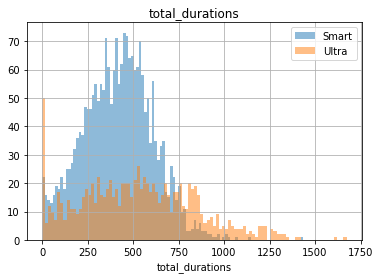


Гистограммы столбца messages_count:


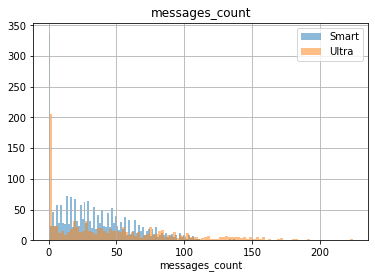


Гистограммы столбца gb_used:


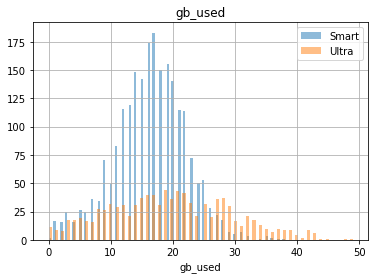

In [59]:
for iter_column in columns:
    plot_hist(iter_column)
    plt.title(iter_column)
    plt.legend(['Smart', 'Ultra'])
    plt.xlabel(iter_column)
    plt.show()
    print('')

#### 2.3.1 Построение гистограммы минут для двух тарифов.

Гистограммы столбца total_durations:


<AxesSubplot:>

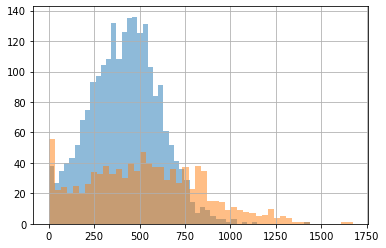

In [60]:
print(f'Гистограммы столбца total_durations:')
data_by_user.query('tariff == "smart"')['total_durations'].hist(bins=50, alpha=0.5)
data_by_user.query('tariff == "ultra"')['total_durations'].hist(bins=50, alpha=0.5)

In [61]:
data_by_user.query('tariff == "smart"')['total_durations'].describe()

count    2229.000000
mean      417.934948
std       190.313730
min         0.000000
25%       282.000000
50%       422.000000
75%       545.000000
max      1435.000000
Name: total_durations, dtype: float64

Пользователи тарифа "Смарт" тратят от 0 до 1100(примерно). Максимальное количесов минкт, потраченных за месяц на этом тарифе - 1435. Минимальное - 0.

Среднее значение = 418 минут. Медиана = 422.

In [62]:
data_by_user.query('tariff == "ultra"')['total_durations'].describe()

count     985.000000
mean      526.623350
std       317.606098
min         0.000000
25%       284.000000
50%       518.000000
75%       752.000000
max      1673.000000
Name: total_durations, dtype: float64

У пользователей тарифом ultra картина иная. Пользователи тратят от 0 до 1300(примерно) минут в мксяц. Максимаьное значение = 1673.

Среднее количество минут потраченных за месяц пользователями данного тарифа = 526. Медиана = 518.

#### 2.3.2 Построение гистограммы минут для двух тарифов.

Гистограммы столбца messages_count:


<AxesSubplot:>

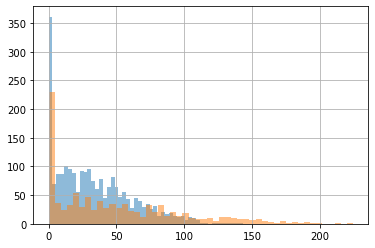

In [63]:
print(f'Гистограммы столбца messages_count:')
data_by_user.query('tariff == "smart"')['messages_count'].hist(bins=50, alpha=0.5)
data_by_user.query('tariff == "ultra"')['messages_count'].hist(bins=50, alpha=0.5)

In [64]:
data_by_user.query('tariff == "smart"')['messages_count'].describe()

count    2229.000000
mean       33.384029
std        28.227876
min         0.000000
25%        10.000000
50%        28.000000
75%        51.000000
max       143.000000
Name: messages_count, dtype: float64

Среднее значение по потраченных смс = 33. Медианное значение = 28. Минимальное количество отправленных смс = 0, максимальное = 143.

In [65]:
data_by_user.query('tariff == "ultra"')['messages_count'].describe()

count    985.000000
mean      49.363452
std       47.804457
min        0.000000
25%        6.000000
50%       38.000000
75%       79.000000
max      224.000000
Name: messages_count, dtype: float64

Среднее значение по потраченных смс = 49. Медианное значение = 38. Минимальное количество отправленных смс = 0, максимальное = 244.

#### 2.3.3 Построение гистограммы интернета для двух тарифов.

Гистограммы столбца gb_used:


<AxesSubplot:>

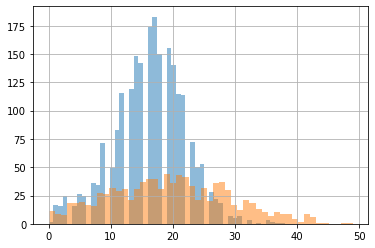

In [66]:
print(f'Гистограммы столбца gb_used:')
data_by_user.query('tariff == "smart"')['gb_used'].hist(bins=50, alpha=0.5)
data_by_user.query('tariff == "ultra"')['gb_used'].hist(bins=50, alpha=0.5)

In [67]:
data_by_user.query('tariff == "smart"')['gb_used'].describe()

count    2229.000000
mean       16.328847
std         5.747061
min         0.000000
25%        13.000000
50%        17.000000
75%        20.000000
max        38.000000
Name: gb_used, dtype: float64

Среднее значение по потраченных гигабайт = 16. Медианное значение = 17. Минимальное количество = 0, максимальное = 38.

In [68]:
data_by_user.query('tariff == "ultra"')['gb_used'].describe()

count    985.000000
mean      19.494416
std        9.853511
min        0.000000
25%       12.000000
50%       19.000000
75%       27.000000
max       49.000000
Name: gb_used, dtype: float64

Среднее значение по потраченных гигабайт = 19. Медианное значение = 19. Минимальное количество = 0, максимальное = 49.

#### 2.3.4 Размер выборки

In [69]:
tariff_users_count = data_by_user.query('tariff == "ultra"')['tariff'].count()
print(f'Размер выборки по тарифу "Ультра" = {tariff_users_count}')
tariff_users_count = data_by_user.query('tariff == "smart"')['tariff'].count()
print(f'Размер выборки по тарифу "Смарт" = {tariff_users_count}')

Размер выборки по тарифу "Ультра" = 985
Размер выборки по тарифу "Смарт" = 2229


**Вывод**

Клиентов, использующих тариф "Ультра" = 985. А тарифом "Смарт" пользуются 2229.
Тариф "Смарт" выгоднее по условиям и по цене, возможно, поэтому его и использует больше клиентов.

Дисперсия для тарифа смарт намного меньше, чем для тарифа ультра: клиенты "смарта" больше походят друг на друга в объемах потребления трафика, пакета минут и смс им по большей части хватает, а вот за интернет в большинстве случаем они доплачивают и не только за 1-2 гб, а даже больше. Можно сказать, что пользователям тарифа "ультра" хватает пакета трафика, исходя из подавляющего большинства таких значений.

## 3. Проверка гипотез

### 3.1 Средняя выручка пользователей тарифов "Ультра" и "Смарт" различаются

В качестве нулевой гипотезы принимается равенство двух показателей, поэтому проверяем, равна ли выручка с двух тарифов между собой. Альтернативная гипотеза звучит как "неравна", поскольку нам не важно, строго меньше или строго больше выручка одного тарифа относительно другого.
Для проверки гипотез использовали критерий о равенстве средних двух генеральных совокупностей, поскольку считаем что мы обладаем случайной выборкой из генеральных совокупностей для каждого тарифа и выборочные средние распределены нормально.
Размеры выборок разные, поэтому применим t-тест для двух генеральных совокупностей с параметром `equal_var = False`

In [70]:
alpha = 0.05
tariff_results = st.ttest_ind(
    data_by_user.query('tariff == "ultra"')['total_month_fee'], 
    data_by_user.query('tariff == "smart"')['total_month_fee'],
    equal_var = False) 

print('p-значение:', tariff_results.pvalue) 

if (tariff_results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.2606313931076085e-250
Отвергаем нулевую гипотезу


**Вывод**

Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различаются. Нулевая гипотеза отвергнута.

### 3.2 Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [71]:
warnings.filterwarnings('ignore')
data_by_user['is_moscow'] = 0
for index in data_by_user.index:
    user_id = data_by_user['user_id'][index]
    city = data_users.query('user_id == @user_id')['city'].reset_index(drop=True)[0]
    data_by_user['is_moscow'][index] = (city == 'Москва')

In [72]:
data_by_user.head(50)
city_users_count = data_by_user.query('is_moscow > 0')['tariff'].count()
print(f'Размер выборки по Москве = {city_users_count}')
city_users_count = data_by_user.query('is_moscow == 0')['tariff'].count()
print(f'Размер выборки по другим регионам = {city_users_count}')

Размер выборки по Москве = 611
Размер выборки по другим регионам = 2603


Размеры выборок разные, поэтому применим t-тест для двух генеральных совокупностей с параметром `equal_var = False`

In [73]:
city_results = st.ttest_ind(
    data_by_user.query('is_moscow > 0')['total_month_fee'], 
    data_by_user.query('is_moscow == 0')['total_month_fee'],
    equal_var = False) 

print('p-значение:', city_results.pvalue) 

if (city_results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5257376663729298
Не получилось отвергнуть нулевую гипотезу


**Вывод**

Cредняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов. Нулевая гипотеза подтверждена.

## 4. Вывод

1) Предобработка данных
- Аномальных значений в столбцах не обнаруженно. В столбце `churn_date` таблицы `data_users` присутствуют пропуски - это свидетельствует о том, что пользователь использует тариф.
- В столбце `duration` таблицы `data_calls` присутствуют нулевые значения - это не аномалия, это значит, что этот звонок был пропущен.
- Не все пользователи используют все функции тарифа, например, количество уникальных пользователей - 500, но звонки совершали только 492. Предположим, что люди, которые не совершали звонов, используют сим-карту для планшета. Смс отправляли только 426 клиентов, возможно, что не все клиенты отправляют смс, потому что в современном мире на место смс пришли месседжеры, такие как: WhatsApp, Telegram, Viber и тд. Интерентом пользуются 497 клиентов: возможно, что эти люди не используют интернет, так как у них кнопочные телефоны без выхода в интернет. Эти клиенты могут быть пенсионеры или люди, работающие на закрытых территориях, где нельзя использовать современные смартфоны.
- В таблице `data_internet` был обнаружен столбец `Unnamed: 0`, который дублирует индексы. Это могло произойти при выгрузке данных, этот столбец был удален.
- В таблицах нет дубликатов, которые нужно удялять, и пропусков, которые нужно заполнять. 
- Округлили значения в большую в столбце `duration` таблицы `data_calls`, все секунды перевели в минуты, потому что оператор списывает только целое количество минут. Далее этот столбец был измен на тип `int`.
- В таблице `data_calls` заменен тип данных на `datetime` в столбце `call_date`.
- В таблице `data_internet` заменен тип данных на `datetime` в столбце `session_date`.
- В таблице `data_messages` заменен тип данных на `datetime` в столбце `message_date`.
- В таблицу `data_calls` добавили столбец `month`, который отражает месяц использования; рассчитали количество сделанных звонков за месяц (`calls_count`) и количество потраченных минут за месяц (`total_durations`).
- В таблицу `data_messages` добавили столбец `month`, который отражает месяц использования; рассчитали количество отправленных сообщений за месяц (`messages_count`).
- В таблицу `data_internet` добавили столбец `month`, который отражает месяц использования; рассчитали количество потраченного трафика в Мб за месяц (`mb_used`) и количество использованного трафика в Гб (`gb_used`). Столбец `gb_used` округлили до большенго целого значения и перевели в тип `int`.

2) Анализ данных
- Написали функцию, которая добавляла столбцы `message_over_tariff_fee`, `minutes_over_tariff_fee` и `gb_over_tariff_fee`, описывающие, сколько сверх тарифа абонеты потратили смс, минут и интернета за месяц.
- Добавили в таблицу столбцы `total_month_fee` и `tariff`, описывающие стоимость абоненской платы в месяц и название тарифа, которым пользуются клиенты.
- Написали функцию, которая рассчитала среднее, дисперсию и стандартное отклонение для тарифов.

- Количество использованных минут всех пользователей тарифа `ultra`:
    - Среднее столбца `total_durations` тарифа ultra = 526.6233502538071
    - Дисперсия столбца `total_durations` тарифа ultra = 100771.22361720211
    - Стандартное отклонение столбца `total_durations` тарифа ultra = 317.444835549741
- Количество использованных смс всех пользователей тарифа `ultra`:
    - Среднее столбца `messages_count` тарифа ultra = 49.36345177664975
    - Дисперсия столбца `messages_count` тарифа ultra = 2282.94607539489
    - Стандартное отклонение столбца `messages_count` тарифа ultra = 47.78018496610169
- Количество использованного трафика всех пользователей тарифа `ultra`: 
    - Среднее столбца `gb_used` тарифа ultra = 19.494416243654822
    - Дисперсия столбца `gb_used` тарифа ultra = 96.99311602978705
    - Стандартное отклонение столбца `gb_used` тарифа ultra = 9.8485083149575
- Количество использованных смс всех пользователей тарифа `smart`:
    - Среднее столбца total_durations тарифа smart = 417.9349484073576
    - Дисперсия столбца total_durations тарифа smart = 36203.06665209465
    - Стандартное отклонение столбца total_durations тарифа smart = 190.27103471651864
- Количество использованных смс всех пользователей тарифа `smart`:
    - Среднее столбца messages_count тарифа smart = 33.384028712427096
    - Дисперсия столбца messages_count тарифа smart = 796.455482917076
    - Стандартное отклонение столбца messages_count тарифа smart = 28.221542886898938
- Количество использованного трафика всех пользователей тарифа `smart`: 
    - Среднее столбца gb_used тарифа smart = 16.328847016599372
    - Дисперсия столбца gb_used тарифа smart = 33.01388745483741
    - Стандартное отклонение столбца gb_used тарифа smart = 5.7457712671874965
- Постоили гистограммы минут для двух тарифов.
- Постоили гистограммы смс для двух тарифов.
- Постоили гистограммы интернета для двух тарифов.



3) Проверка гепотез
- Клиентов, использующих тариф "Ультра" = 985. А тарифом "Смарт" пользуются 2229.
Тариф "Смарт" выгоднее по условиям и по цене, возможно, поэтому его и использует больше клиентов.

- Дисперсия для тарифа смарт намного меньше, чем для тарифа ультра: клиенты "смарта" больше походят друг на друга в объемах потребления трафика, пакета минут и смс им по большей части хватает, а вот за интернет в большинстве случаем они доплачивают и не только за 1-2 гб, а даже больше. Можно сказать, что пользователям тарифа "ультра" хватает пакета трафика, исходя из подавляющего большинства таких значений.

- Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различаются: тариф "Ультра" приносит больше денег.

- Cредняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов, значит рекламную кампанию можно не адаптировать конкретно под Москву и другие регионы.